In [8]:
#tensorflow_version 1.x

from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
import tensorflow
tensorflow.__version__

'2.0.0'

first model

In [9]:
classifier = Sequential()

classifier.add(Convolution2D(96, 11, strides= (4, 4), padding= 'valid', input_shape=(224,224,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2, 2), strides= (2, 2), padding= 'valid'))
classifier.add(BatchNormalization())
classifier.add(Convolution2D(256, 11, strides= (1, 1), padding= 'valid', activation= 'relu'))
classifier.add(MaxPooling2D(pool_size= (2, 2), strides= (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# flattening step
classifier.add(Flatten())

# full connection step
classifier.add(Dense(units= 4096, activation= 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4, activation = 'softmax'))
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)            

In [10]:
classifier.compile(optimizer= 'adam',
                  loss= 'categorical_crossentropy',
                  metrics= ['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

In [12]:
training_data_dir = "/content/drive/My Drive/capstone/data/apple_data/train"

test_data_dir = "/content/drive/My Drive/capstone/data/apple_data/test"

In [13]:
training_set = train_datagen.flow_from_directory(training_data_dir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_data_dir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

print(training_set.class_indices)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/My Drive/capstone/data/apple_data/train'

In [14]:
history = classifier.fit_generator(training_set,
                                   steps_per_epoch=training_set.samples//batch_size,
                                   validation_data=test_set,
                                   epochs=20,
                                   validation_steps=test_set.samples//batch_size)

NameError: name 'training_set' is not defined

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

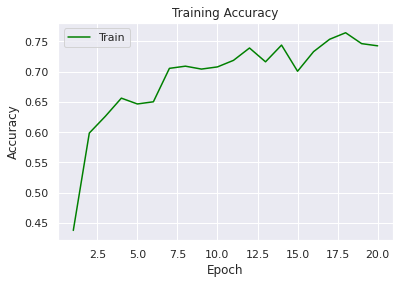

In [10]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

second model

In [ ]:
classifier = Sequential()

classifier.add(Convolution2D(96, 11, strides= (4, 4), padding= 'valid', input_shape=(224,224,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2, 2), strides= (2, 2), padding= 'valid'))
classifier.add(BatchNormalization())
classifier.add(Convolution2D(256, 11, strides= (1, 1), padding= 'valid', activation= 'relu'))
classifier.add(MaxPooling2D(pool_size= (2, 2), strides= (2, 2), padding='valid'))
classifier.add(BatchNormalization())
classifier.add(Convolution2D(348, 3, strides= (1, 1), padding= 'valid', activation= 'relu'))
classifier.add(BatchNormalization())
classifier.add(Convolution2D(384, 3, strides= (1,1), padding= 'valid', activation= 'relu'))
classifier.add(BatchNormalization())
classifier.add(Convolution2D(256, 3, strides= (1, 1), padding= 'valid', activation= 'relu'))
classifier.add(MaxPooling2D(pool_size= (2, 2), strides= (2, 2), padding= 'valid'))
classifier.add(BatchNormalization())

# flattening step
classifier.add(Flatten())

# full connection step
classifier.add(Dense(units= 4096, activation= 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units= 4096, activation= 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4, activation = 'softmax'))
classifier.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024

In [ ]:
classifier.compile(optimizer= 'adam',
                  loss= 'categorical_crossentropy',
                  metrics= ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

In [ ]:
training_data_dir = "/content/drive/My Drive/capstone/data/apple_data/train"

test_data_dir = "/content/drive/My Drive/capstone/data/apple_data/test"

In [ ]:
training_set = train_datagen.flow_from_directory(training_data_dir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_data_dir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

print(training_set.class_indices)

Found 832 images belonging to 4 classes.
Found 0 images belonging to 0 classes.
{'apple_black_rot': 0, 'apple_cedar_rust': 1, 'apple_health': 2, 'apple_scab': 3}


In [ ]:
# checkpoint

weightpath = "weights_1.hdf5"
checkpoint = ModelCheckpoint(weightpath, monitor= 'val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# fitting images to CNN

history = classifier.fit_generator(training_set,
                          steps_per_epoch=training_set.samples//batch_size,
                          validation_data=test_set,
                          epochs=20,
                          validation_steps=test_set.samples//batch_size,
                          callbacks=callbacks_list)

Epoch 1/20
26/26 [==============================] - 281s 11s/step - loss: 2.6074 - acc: 0.4327
Epoch 2/20


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


26/26 [==============================] - 131s 5s/step - loss: 1.3899 - acc: 0.5084
Epoch 3/20
26/26 [==============================] - 131s 5s/step - loss: 1.1365 - acc: 0.5769
Epoch 4/20
26/26 [==============================] - 131s 5s/step - loss: 1.0456 - acc: 0.6130
Epoch 5/20
26/26 [==============================] - 131s 5s/step - loss: 0.9963 - acc: 0.6250
Epoch 6/20
26/26 [==============================] - 130s 5s/step - loss: 1.0330 - acc: 0.6106
Epoch 7/20
26/26 [==============================] - 130s 5s/step - loss: 0.9395 - acc: 0.6442
Epoch 8/20
26/26 [==============================] - 131s 5s/step - loss: 0.9269 - acc: 0.6599
Epoch 9/20
26/26 [==============================] - 130s 5s/step - loss: 0.9161 - acc: 0.6575
Epoch 10/20
26/26 [==============================] - 131s 5s/step - loss: 0.8580 - acc: 0.6887
Epoch 11/20
26/26 [==============================] - 131s 5s/step - loss: 0.8224 - acc: 0.6671
Epoch 12/20
26/26 [==============================] - 131s 5s/step - l

In [ ]:
history = classifier.fit_generator(training_set,
                                   steps_per_epoch=training_set.samples//batch_size,
                                   validation_data=test_set,
                                   epochs=20,
                                   validation_steps=test_set.samples//batch_size)

Epoch 1/20
26/26 [==============================] - 132s 5s/step - loss: 0.6750 - acc: 0.7320
Epoch 2/20
26/26 [==============================] - 130s 5s/step - loss: 0.6933 - acc: 0.7344
Epoch 3/20
26/26 [==============================] - 130s 5s/step - loss: 0.7281 - acc: 0.7175
Epoch 4/20
26/26 [==============================] - 130s 5s/step - loss: 0.6354 - acc: 0.7512
Epoch 5/20
26/26 [==============================] - 130s 5s/step - loss: 0.6360 - acc: 0.7416
Epoch 6/20
26/26 [==============================] - 131s 5s/step - loss: 0.6226 - acc: 0.7536
Epoch 7/20
26/26 [==============================] - 132s 5s/step - loss: 0.6563 - acc: 0.7500
Epoch 8/20
26/26 [==============================] - 132s 5s/step - loss: 0.6399 - acc: 0.7536
Epoch 9/20
26/26 [==============================] - 131s 5s/step - loss: 0.6030 - acc: 0.7608
Epoch 10/20
26/26 [==============================] - 131s 5s/step - loss: 0.6000 - acc: 0.7524
Epoch 11/20
26/26 [==============================] - 130s 5

In [ ]:
filepath= "cnn_apple.hdf5"
classifier.save(filepath)

In [ ]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

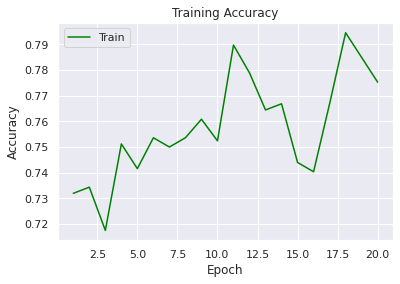

In [ ]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

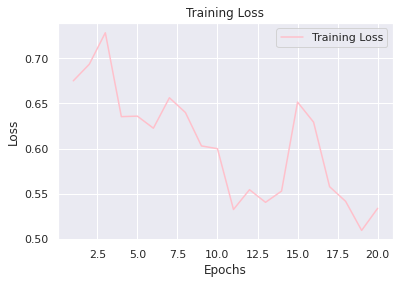

In [ ]:
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()